<h1> How we are going to handle data in sequential manner </h1></br>
<font color = "yellow">
Step 1: We will handle missing value first </br>
Step 2: Then, we need to encode the categorical data</br>
step 3: We'll handle outliar </br>
step 4: We'll perform feature engineering</br>
step 5: After that we'll shuffle the data</br>
step 6: Then scalling on the data will be performed </br>
step 7: Finally, splitting data will be done</br>
<h2> This is what the dataset will contain </h2>


<font color = "yellow">
Initial Stage </br>
<font color = "white">
Upload the data through google drive by mounting.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/diabetes_two (1) (2).csv')

<h5> Just checking the data ; nothing else </h5>

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.describe()

,Age
count,519.000000
mean,49.082852
std,27.104027
min,16.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,600.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [7]:
df.isnull().sum()

,0
Age,1
Gender,1
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,1
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [8]:
age_mean = df['Age'].mean()

In [9]:
df['Age'] = df['Age'].fillna(age_mean)

In [10]:
gender_max = df['Gender'].mode().iloc[0]
df['Gender'] = df['Gender'].fillna(gender_max)
weakness_max = df['weakness'].mode().iloc[0]
df['weakness'] = df['weakness'].fillna(weakness_max)

In [11]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0




<h2> Encoding Categorical Data </h2>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            520 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
ls = LabelEncoder()

In [20]:
df['Polyuria'] = ls.fit_transform(df['Polyuria'])
df['Polydipsia'] = ls.fit_transform(df['Polydipsia'])
df['sudden weight loss'] = ls.fit_transform(df['sudden weight loss'])
df['Genital thrush'] = ls.fit_transform(df['Genital thrush'])
df['visual blurring'] = ls.fit_transform(df['visual blurring'])
df['Irritability'] = ls.fit_transform(df['Irritability'])
df['delayed healing'] = ls.fit_transform(df['delayed healing'])
df['partial paresis'] = ls.fit_transform(df['partial paresis'])
df['muscle stiffness'] = ls.fit_transform(df['muscle stiffness'])
df['Alopecia'] = ls.fit_transform(df['Alopecia'])
df['Obesity'] = ls.fit_transform(df['Obesity'])
df['class'] = ls.fit_transform(df['class'])
df['weakness'] = ls.fit_transform(df['weakness'])
df['Polyphagia'] = ls.fit_transform(df['Polyphagia'])
df['Itching'] = ls.fit_transform(df['Itching'])
df['Gender'] = ls.fit_transform(df['Gender'])



In [21]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.000000,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.000000,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,49.082852,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.000000,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,600.000000,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


label encoder is like a binary encoder, it works with 0 and 1; in this dataset, it basically contains data like that, so didn't have to use any other encoder.

<h1> This dataset starts from here </h1> </br>
<font color = "yellow"> Outliar Handling

<font color = "blue"> Visually finding outliar

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

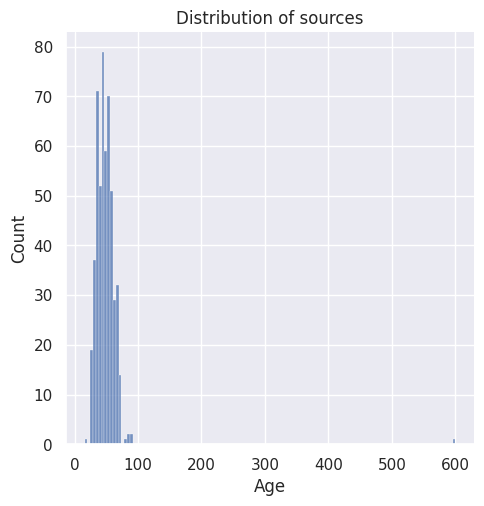

In [25]:
sns.set_theme(color_codes = "red")
sns.displot(data = df['Age']).set(title = "Distribution of sources")

In [26]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,49.082852,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,27.077902,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2> By using mathematics </h2>
Z score formula = (X_value) - (X_mean)/(X_standard deviation)

In [27]:
z_score = (df['Age'] - df['Age'].mean())/df['Age'].std()

In [30]:
for i in z_score:
  if i<-3:
    print("You have Outliar: ",i)
  elif i>3:
    print("YOu have outliar: ",i)
  else:
    continue

YOu have outliar:  20.34563622506856


In [32]:
index = z_score.index[z_score == 20.34563622506856][0]

In [33]:
print(index)

4


In [34]:
df['Age'][4]

np.float64(600.0)

In [35]:
age_mean = df['Age'].mean()

In [36]:
df['Age'][4] = age_mean

/tmp/ipython-input-3045558376.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age'][4] = age_mean
/tmp/ipython-input-3045558376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

In [37]:
print(df['Age'][4])

49.08285163776493
